# Exploratory data analysis

In [1]:
!pip install wordcloud nltk -q

## Analysis

In [68]:
import numpy as np
import pandas as pd

products = pd.read_csv('./dataset/Amazon-Products.csv')
products.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [48]:
products.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [79]:
products.drop(columns=['Unnamed: 0'], inplace=True)

In [103]:
df = products.copy()

In [104]:
def clean_price(price) -> float:
    if pd.isna(price):
        return price
    return float(str(price).replace('₹', '').replace(',', ''))

df['discount_price'] = df['discount_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)

In [105]:
df['discount_percentage'] = df.apply(
    lambda x: 1 - (x['discount_price'] / x['actual_price']) if x['actual_price'] != 0 else 0,
    axis=1
)

In [106]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [107]:
def clean_numeric(value):
    try:
        return float(str(value).replace(',', ''))
    except ValueError:
        return np.nan
df['ratings'] = df['ratings'].apply(clean_numeric)
df['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, nan, 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5, 1.1])

In [108]:
df['no_of_ratings'] = df['no_of_ratings'].apply(clean_numeric)
df['no_of_ratings'].isna().sum()

182027

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 551585 non-null  object 
 1   main_category        551585 non-null  object 
 2   sub_category         551585 non-null  object 
 3   image                551585 non-null  object 
 4   link                 551585 non-null  object 
 5   ratings              369558 non-null  float64
 6   no_of_ratings        369558 non-null  float64
 7   discount_price       490422 non-null  float64
 8   actual_price         533772 non-null  float64
 9   discount_percentage  490425 non-null  float64
dtypes: float64(5), object(5)
memory usage: 42.1+ MB


In [110]:
df.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage
count,369558.000000,369558.000000,4.904220e+05,5.337720e+05,490425.000000
mean,3.832311,840.778698,2.623161e+03,2.311128e+04,0.492565
std,0.756102,8651.536018,9.458196e+03,1.355082e+07,0.214002
min,1.000000,1.000000,8.000000e+00,0.000000e+00,0.000000
25%,3.500000,4.000000,3.890000e+02,9.900000e+02,0.350250
50%,3.900000,20.000000,6.790000e+02,1.599000e+03,0.501877
75%,4.300000,133.000000,1.399000e+03,2.999000e+03,0.658439
max,5.000000,589547.000000,1.249990e+06,9.900000e+09,1.000000


In [111]:
# Plot the total missing values
import plotly.express as px

x = df.isnull().sum()

fig = px.bar(x, orientation = "h",  text_auto='.2s',
            color_discrete_sequence= ["#ff6b00"] * len(x))
fig.update_layout(
    title="<b>Missing Value Count</b>",
    xaxis_title="Total missing values",
    yaxis_title="Column Names",
    plot_bgcolor = "#ECECEC",
    showlegend=False
)
fig.show()

In [112]:
# Droping the columns with 70% or more missing data
# df = products.copy()
perc = 70.0
min_count =  int(((100 - perc)/100) * df.shape[1] + 1)
mod_df = df.dropna(axis = 1, thresh = min_count)
print('all products', products.shape)
print('atleast 70% notna:', mod_df.shape)

all products (551585, 9)
atleast 70% notna: (551585, 10)


=> There is no row with more than 70% of missing data

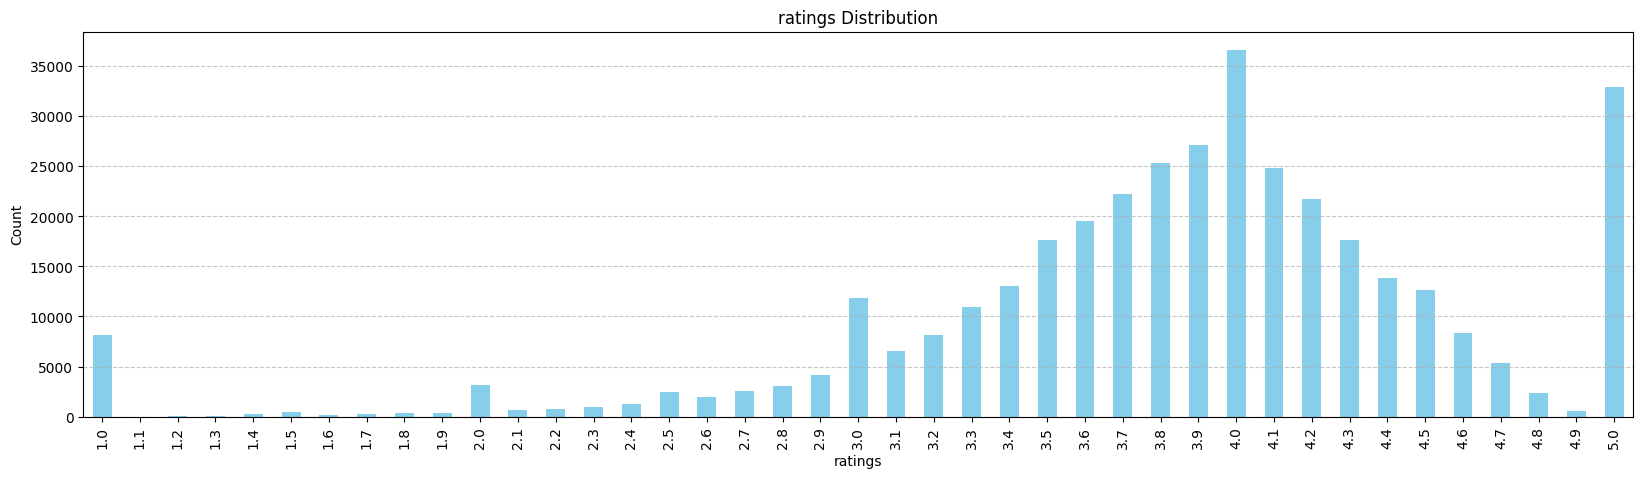

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

def counter_plot(dataframe, col_name):
  # Plot value counts
  dataframe.plot(
      kind='bar',
      color='skyblue',
      figsize=(20, 5)
  )
  plt.title(f'{col_name} Distribution')
  plt.xlabel(col_name)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()



plot_data = df['ratings'].value_counts().sort_index()
counter_plot(plot_data, 'ratings')

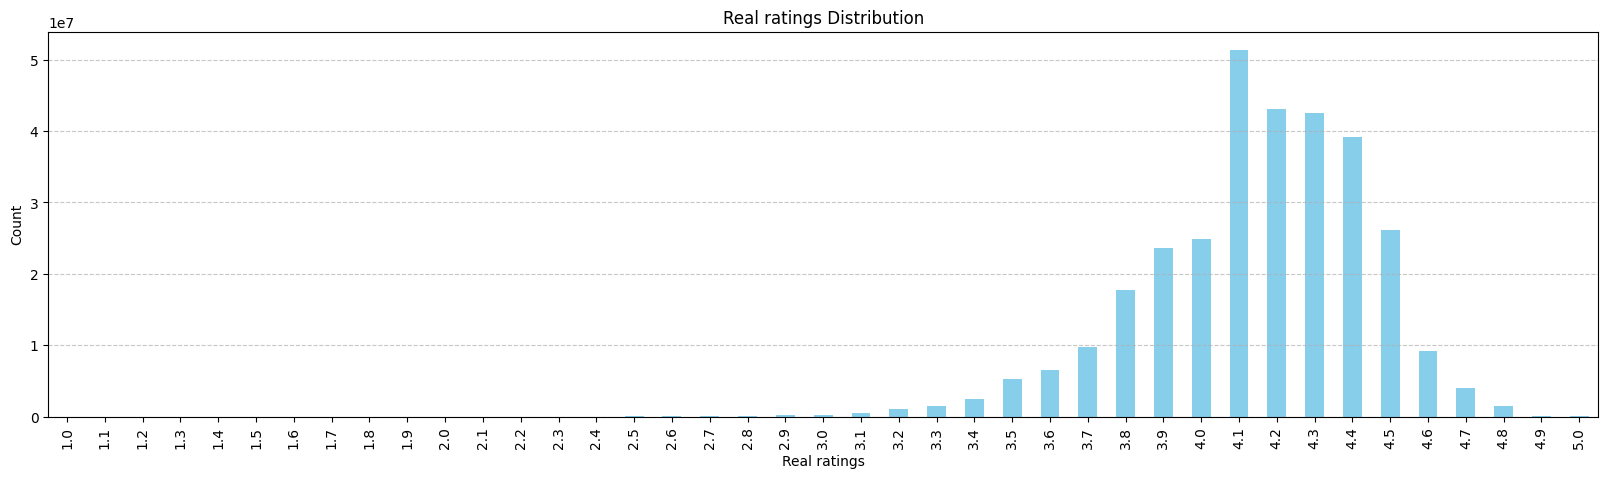

In [128]:
plot_data = df.groupby('ratings')['no_of_ratings'].sum().sort_index()
counter_plot(plot_data, 'Real ratings')

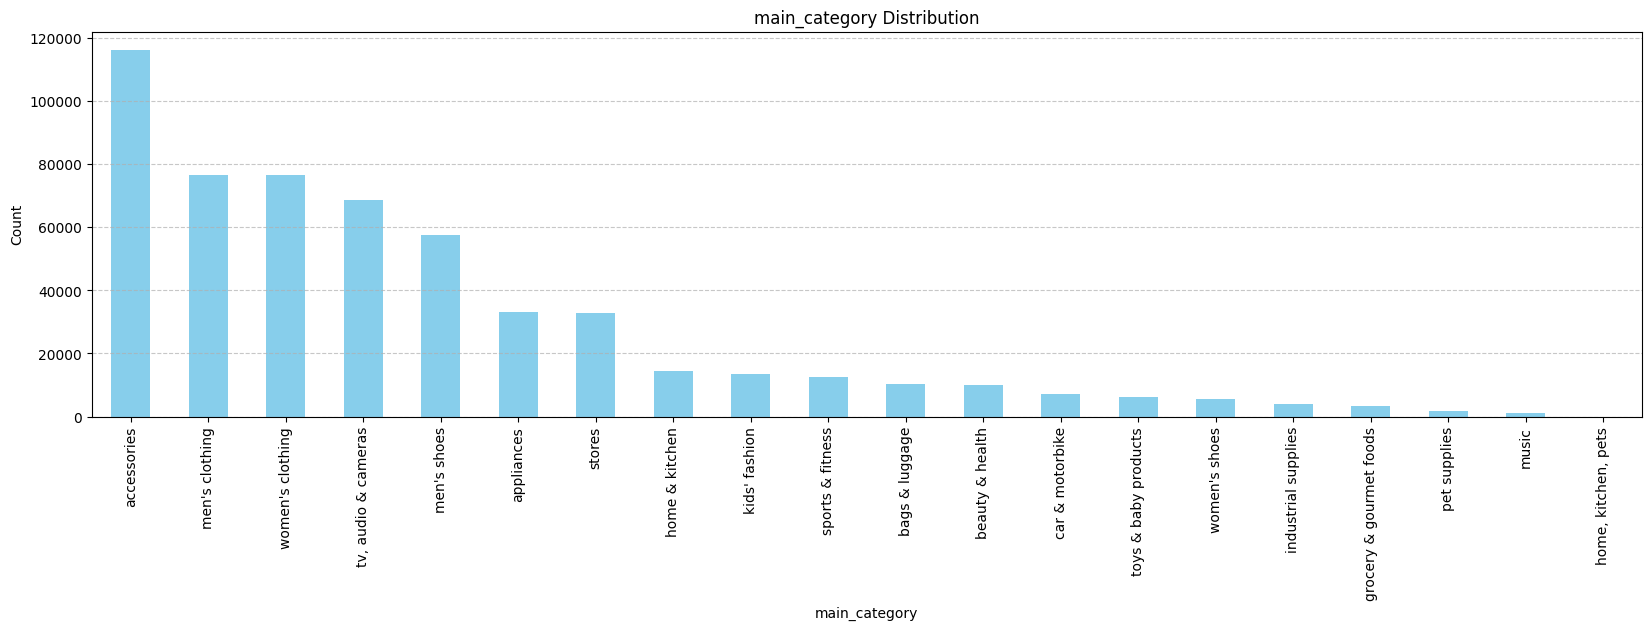

In [125]:
plot_data = df['main_category'].value_counts()
counter_plot(plot_data, 'main_category')

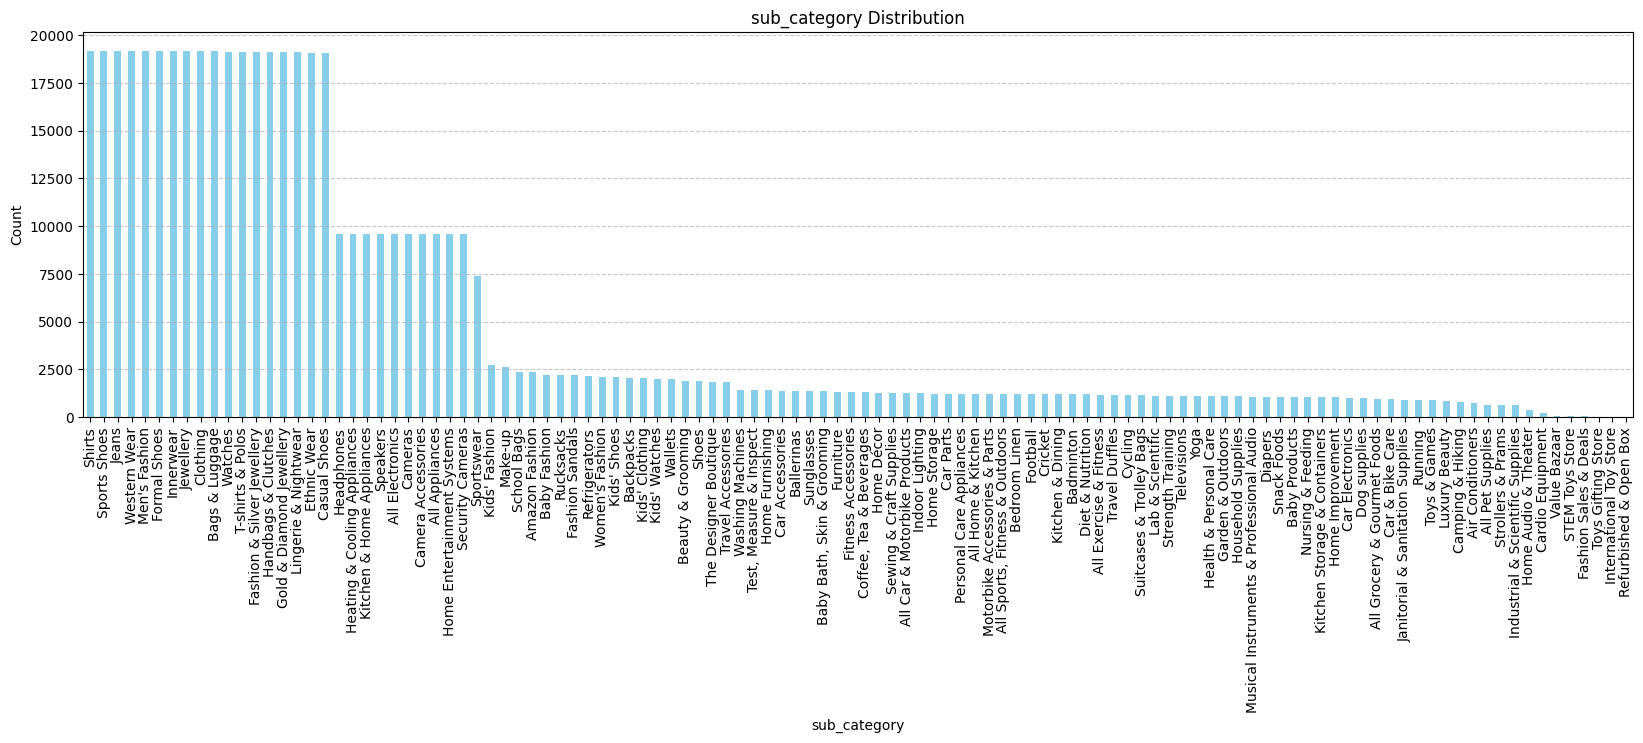

In [136]:
plot_data = df['sub_category'].value_counts()
counter_plot(plot_data, 'sub_category')

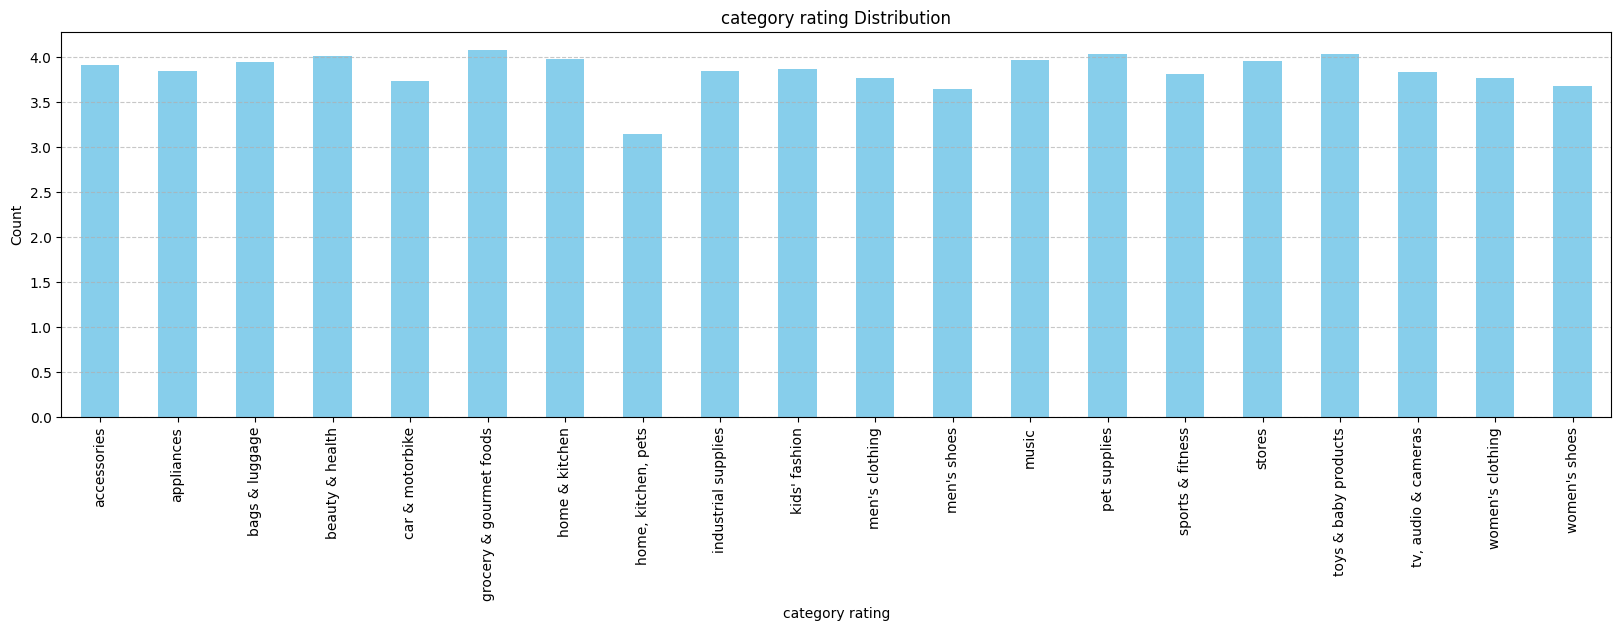

In [138]:
plot_data = df.groupby('main_category')['ratings'].mean()
counter_plot(plot_data, 'category rating')

## Wordcloud
plot word cloud for all categories

In [6]:
import random
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))


def get_text(products, wordcloud_category):
    return ' '.join(products[products.sub_category == wordcloud_category].name.tolist())


def plot_wordcloud(wordcloud_text, wordcloud_category):

    color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=nltk_stopwords,
        colormap=random.choice(color_maps),
        # regexp=r'\w+',
    ).generate(wordcloud_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud of products "{wordcloud_category}"')
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import pandas as pd
products = pd.read_csv('./dataset/Amazon-Products.csv')
products.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [8]:
sub_categories = products.sub_category.unique()
print('number of sub categories:', len(sub_categories))

number of sub categories: 112


In [150]:
print(sub_categories)

['Air Conditioners' 'All Appliances' 'All Car & Motorbike Products'
 'All Electronics' 'All Exercise & Fitness' 'All Grocery & Gourmet Foods'
 'All Home & Kitchen' 'All Pet Supplies' 'All Sports, Fitness & Outdoors'
 'Amazon Fashion' 'Baby Bath, Skin & Grooming' 'Baby Fashion'
 'Baby Products' 'Backpacks' 'Badminton' 'Bags & Luggage' 'Ballerinas'
 'Beauty & Grooming' 'Bedroom Linen' 'Camera Accessories' 'Cameras'
 'Camping & Hiking' 'Car & Bike Care' 'Car Accessories' 'Car Electronics'
 'Car Parts' 'Cardio Equipment' 'Casual Shoes' 'Clothing'
 'Coffee, Tea & Beverages' 'Cricket' 'Cycling' 'Diapers'
 'Diet & Nutrition' 'Dog supplies' 'Ethnic Wear'
 'Fashion & Silver Jewellery' 'Fashion Sales & Deals' 'Fashion Sandals'
 'Fitness Accessories' 'Football' 'Formal Shoes' 'Furniture'
 'Garden & Outdoors' 'Gold & Diamond Jewellery' 'Handbags & Clutches'
 'Headphones' 'Health & Personal Care' 'Heating & Cooling Appliances'
 'Home Audio & Theater' 'Home Décor' 'Home Entertainment Systems'
 'Home

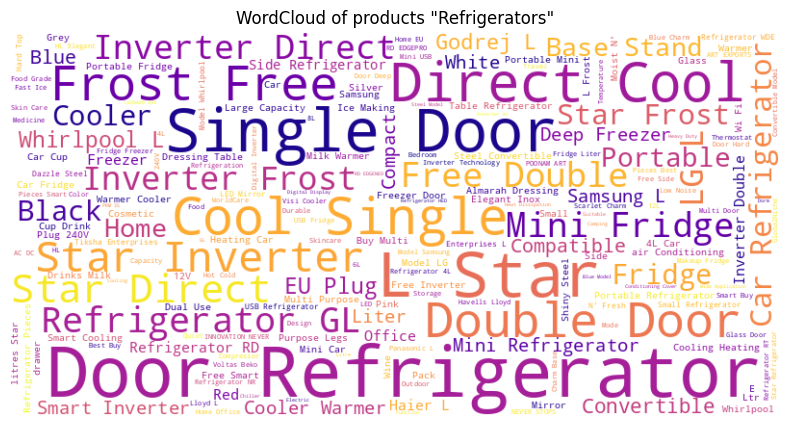

In [9]:
wordcloud_category = 'Refrigerators'  # 'Televisions'

plot_wordcloud(
    wordcloud_text=get_text(products, wordcloud_category),
    wordcloud_category=wordcloud_category
)

## Extract Features from names (Televisions)

In [222]:
tvs = df[df.sub_category=='Televisions'].drop(columns=['main_category', 'sub_category', 'image', 'link'])
tv_df = tvs.dropna(subset=['actual_price'])
tv_df = tvs.fillna(0)
tv_df

,name,ratings,no_of_ratings,discount_price,actual_price,discount_percentage
498234,Samsung 80 cm (32 Inches) Wondertainment Serie...,4.2,8877.0,12990.0,22900.00,0.432751
498235,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,4.2,34286.0,13999.0,24999.00,0.440018
498236,Redmi 80 cm (32 inches) Android 11 Series HD R...,4.2,47642.0,13999.0,24999.00,0.440018
498237,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,4.2,8290.0,38999.0,49999.00,0.220004
498238,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,4.2,36800.0,14999.0,19999.00,0.250013
...,...,...,...,...,...,...
499333,"HAMLITE TV LED Backlight USB Powered, 6500K Wh...",4.4,694.0,0.0,0.00,0.000000
499334,Impex Grande 43 Smart AU10 108 cm (43 inch) Go...,0.0,0.0,0.0,0.00,0.000000
499335,Haier 32 inch LED TV LE32B9200WB,0.0,0.0,0.0,0.00,0.000000
499336,Haier 80 cm (32 Inches) HD Ready Smart LED TV ...,0.0,0.0,0.0,0.00,0.000000


In [223]:
from collections import Counter

brands = tv_df['name'].apply(lambda name: name.split()[0]).tolist()
print(Counter(brands))

Counter({'MICROSMT': 118, 'Samsung': 88, 'LG': 65, 'Sony': 37, 'INVANTER': 21, 'TCL': 20, 'Kodak': 19, 'Power': 19, 'ONLY': 18, 'Hisense': 16, 'imee': 15, '80': 15, 'Nextview': 15, 'Acer': 13, 'Daktron': 13, 'LED': 13, 'Make': 12, 'OnePlus': 11, 'Westinghouse': 11, 'AKAI': 11, 'Jagabandhu': 11, 'VW': 10, 'coocaa': 10, 'SKYWALL': 10, 'HYUNDAI': 10, 'Ultra': 10, 'NEBILLIO': 10, 'JJ': 10, 'Vu': 9, 'Candes': 9, 'Intex': 9, 'MI': 8, 'Onida': 8, 'Foxsky': 8, 'Haier': 8, 'IQ': 8, 'Star': 7, 'Crownton': 7, 'TRUSENSE': 7, 'HD': 7, 'Redmi': 6, 'iFFALCON': 6, 'VU': 6, 'TOSHIBA': 6, 'Sansui': 6, 'Mi': 6, 'Huidi': 6, 'Kevin': 6, 'Impex': 6, 'Philips': 6, 'Cornea': 6, 'Salora': 6, 'Sri': 6, 'SANSUI': 5, 'BPL': 5, '(Renewed)': 5, 'Compaq': 5, 'Beston': 5, 'iMee': 5, 'SGUV': 5, 'GOQii': 5, 'TELESTONE': 5, 'V-SKY': 5, 'IWIS': 5, 'RR': 5, 'IAIR': 5, 'REALMERCURY': 4, 'NVY': 4, 'Dot': 4, 'ASIN': 4, 'Limeberry': 4, 'RB': 4, 'Enterprises': 4, 'HAPPYU': 4, '108': 4, 'Smart': 4, 'KOUSTHUBA': 4, 'KEITECH': 4,

=> Unfortunately there are values which are not brands, So we should choose!!

In [224]:
text = tv_df['name'].apply(lambda name: nltk.word_tokenize(name)).tolist()
tokens = [token for sublist in text for token in sublist]
tokens_without_stopwords = [token.lower() for token in tokens if token not in nltk_stopwords and not token.isdigit()]
word_counter = Counter(tokens_without_stopwords)
print(len(word_counter))
important_words = {key: count for key, count in word_counter.items() if count > 20}
len(important_words)

1667


51

between 1667 words, 51 of them occured more than 20 times and these words seems more important:

 ```
 'samsung': 95,
 'hd': 731,
 'led': 899,
 'smart': 944,
 'android': 300,
 '4k': 366,
 'ultra': 317,
 'pro': 22,
 'full': 131,
 'frameless': 93,
 'crystal': 21,
 'lg': 70,
 'google': 83,
 'tcl': 24,
 'certified': 64,
 'sony': 37,
 'bravia': 37,
 'remote': 37,
 'qled': 56,
 'premium': 28,
 'alexa': 24,
 'oled': 29,
 'invanter': 21,
 'microsmt': 136,
 ```

In [225]:
new_features = ['samsung', 'hd', 'led', 'smart', 'android', '4k', 'ultra', 'pro', 'full', 'frameless', 'crystal', 'lg', 'google', 'tcl', 'certified', 'sony', 'bravia', 'remote', 'qled', 'premium', 'alexa', 'oled', 'invanter', 'microsmt']
for feature in new_features:
  tv_df[feature] = tv_df['name'].apply(lambda name: feature in name.lower())

tv_df


,name,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,samsung,hd,led,smart,...,certified,sony,bravia,remote,qled,premium,alexa,oled,invanter,microsmt
498234,Samsung 80 cm (32 Inches) Wondertainment Serie...,4.2,8877.0,12990.0,22900.00,0.432751,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
498235,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,4.2,34286.0,13999.0,24999.00,0.440018,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
498236,Redmi 80 cm (32 inches) Android 11 Series HD R...,4.2,47642.0,13999.0,24999.00,0.440018,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
498237,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,4.2,8290.0,38999.0,49999.00,0.220004,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
498238,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,4.2,36800.0,14999.0,19999.00,0.250013,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499333,"HAMLITE TV LED Backlight USB Powered, 6500K Wh...",4.4,694.0,0.0,0.00,0.000000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
499334,Impex Grande 43 Smart AU10 108 cm (43 inch) Go...,0.0,0.0,0.0,0.00,0.000000,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False
499335,Haier 32 inch LED TV LE32B9200WB,0.0,0.0,0.0,0.00,0.000000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
499336,Haier 80 cm (32 Inches) HD Ready Smart LED TV ...,0.0,0.0,0.0,0.00,0.000000,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [226]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [227]:
import re

def extract_parenthesis_groups(text):
    return re.findall(r'\(([^)]*)\)', text)

def extract_cm_value(text):
    match = re.search(r'(\d+)\s*cm', text, re.IGNORECASE)
    return match.group(1) if match else None

def extract_inch_value(text):
    # match = re.search(r'(\d+)\s*inch', text, re.IGNORECASE)
    match = re.search(r'(\d+)\s*(?:inch|")', text, re.IGNORECASE)

    return match.group(1) if match else None

def extract_p_value(text):
    match = re.search(r'(\d+)\s*p', text, re.IGNORECASE)
    return match.group(1) if match else None

def extract_year_value(text):
    match = re.search(r'(\d+)\s*model', text, re.IGNORECASE)
    return match.group(1) if match else None

def compute_size(row):
    if pd.notna(row['cm']):
        return row['cm']
    if pd.notna(row['inch']):
        return float(row['inch']) * 2.54
    else:
        return np.nan



tv_df['inch'] = tv_df['name'].apply(lambda name: extract_inch_value(name))
tv_df['cm'] = tv_df['name'].apply(lambda name: extract_cm_value(name))
tv_df['size'] = tv_df.apply(compute_size, axis=1)
# tv_df['p'] = tv_df['name'].apply(lambda name: extract_p_value(name))
tv_df['model_year'] = tv_df['name'].apply(lambda name: extract_year_value(name))
tv_df['paranthesis'] = tv_df['name'].apply(lambda name: extract_parenthesis_groups(name))

All colors in names: (found using paranthesis)
```[
  'ebony black', 'grey', 'glossy black', 'titan gray', 'pearl white',
  'rocky black', 'silver', 'carbon silver', 'armani gold', 'dark grey',
  'black', 'ceramic black', 'gray', 'white', 'light black', 'dark iron gray',
  'titan black', 'black-hair line', 'bright silver', 'metallic grey',
  'dark meteo titan', 'mystique black', 'dark steel silver', 'meteor titanium',
  'rose gold', 'metallic black', 'gold', 'midnight black', 'champagne',
  'metal gray', 'golden', 'ashed blue', 'phantom black', 'charcoal grey',
  'cloud white'
]

```


=> simplified:

```
[
  'grey',
  'silver',
  'gold',
  'black',
  'gray',
  'white',
  'champagne',
  'blue',
  'red'
]

```


In [228]:
colors = [
  'silver', 'gold', 'black', 'white', 'champagne', 'blue', 'red' # 'grey', 'gray',
]
tv_df['gray'] = tv_df['name'].apply(lambda name: 'gray' in name.lower() or 'grey' in name.lower())
for color in colors:
  tv_df[color] = tv_df['name'].apply(lambda name: color in name.lower())


In [230]:
tv_df.columns

Index(['name', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price',
       'discount_percentage', 'samsung', 'hd', 'led', 'smart', 'android', '4k',
       'ultra', 'pro', 'full', 'frameless', 'crystal', 'lg', 'google', 'tcl',
       'certified', 'sony', 'bravia', 'remote', 'qled', 'premium', 'alexa',
       'oled', 'invanter', 'microsmt', 'inch', 'cm', 'size', 'model_year',
       'paranthesis', 'gray', 'silver', 'gold', 'black', 'white', 'champagne',
       'blue', 'red'],
      dtype='object')

In [229]:
tv_df.drop(columns=['name', 'inch', 'cm', 'paranthesis'])

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,samsung,hd,led,smart,android,...,size,model_year,gray,silver,gold,black,white,champagne,blue,red
498234,4.2,8877.0,12990.0,22900.00,0.432751,True,True,True,True,False,...,80,None,False,False,False,True,False,False,False,False
498235,4.2,34286.0,13999.0,24999.00,0.440018,False,True,True,True,True,...,80,None,False,False,False,True,False,False,False,False
498236,4.2,47642.0,13999.0,24999.00,0.440018,False,True,True,True,True,...,80,None,False,False,False,True,False,False,False,True
498237,4.2,8290.0,38999.0,49999.00,0.220004,False,True,True,True,True,...,138,None,False,False,False,True,False,False,False,False
498238,4.2,36800.0,14999.0,19999.00,0.250013,False,True,True,True,True,...,80,None,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499333,4.4,694.0,0.0,0.00,0.000000,False,False,True,False,False,...,165.1,None,False,False,False,False,True,False,False,True
499334,0.0,0.0,0.0,0.00,0.000000,False,True,True,True,True,...,108,None,False,False,False,False,False,False,False,False
499335,0.0,0.0,0.0,0.00,0.000000,False,False,True,False,False,...,81.28,None,False,False,False,False,False,False,False,False
499336,0.0,0.0,0.0,0.00,0.000000,False,True,True,True,False,...,80,2019,False,False,False,True,False,False,False,False
